In [196]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

X = np.append(np.append( np.asarray([1]*100) , x) , y)
X = np.reshape(X, (3, 100))

(3, 100)

## Plot the training data

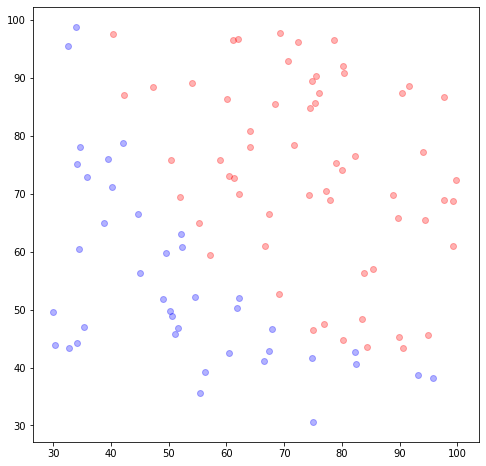

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [250]:
seta = np.asarray([-50, -10, 2.0])
np.reshape(seta, (3, 1))
seta_list = [seta.copy()]
err_list = []

lr = 0.002
epochs = 6000000
A = None
M = len(x)

for i in range(epochs):
    #forpass
    Z = np.dot(seta, X)
    A = 1/(1+np.exp(-Z))
    ERR = -(label-A)
    
    #backprop
    for k in range(3):
        seta[k] -= lr * np.sum(ERR * X[k]) / M
    
    #history
    seta_list.append(seta.copy())
    A = np.clip(A, 1e-10, 1-1e-10)
    
    loss = np.sum(-(label*np.log(A) + (1-label)*np.log(1-A)))/M
    err_list.append(loss)

In [251]:
correct = 0
for i, a in enumerate(A):
    if a <= 0.5 and label[i] == 0 :
        correct += 1
    elif a > 0.5 and label[i] == 1:
        correct += 1

print(correct)

90


## Plot the estimated parameters

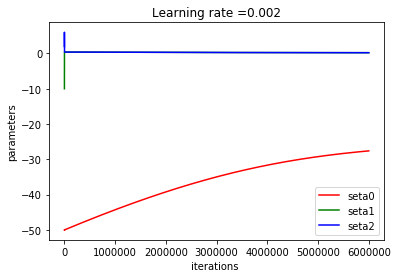

In [252]:
colors = ['r', 'g', 'b']
for i in range(3):
    temp_list = [x[i] for x in seta_list]
    plt.plot(np.squeeze(temp_list), color = colors[i], label=f"seta{i}")
plt.ylabel('parameters')
plt.xlabel('iterations ')
plt.legend()
plt.title("Learning rate =" + str(lr))
plt.show()

## Plot the training error 

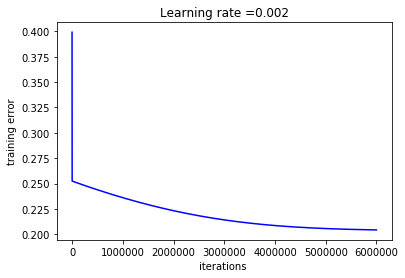

In [259]:
plt.plot(np.squeeze(err_list[600:]), color='b')
plt.ylabel('training error')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(lr))
plt.show()

## Plot the obtained classifier 

In [264]:
xs = np.arange(30, 100.5, 0.5)
ys = np.arange(30, 100.5, 0.5)

In [273]:
len(xs)

141

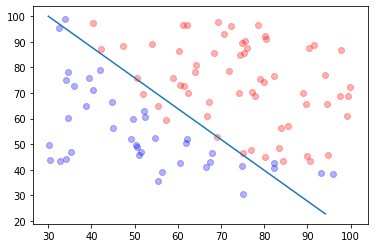

In [267]:
p1 = (xs[0], -(seta[1]*xs[0] + seta[0])/seta[2] )
p2 = (xs[-1], -(seta[1]*xs[-1] + seta[0])/seta[2] )
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.plot(p1, p2)
plt.show()

In [278]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [285]:
Zs = np.meshgrid(xs, ys)

In [287]:
Zs

[array([[ 30. ,  30.5,  31. , ...,  99. ,  99.5, 100. ],
        [ 30. ,  30.5,  31. , ...,  99. ,  99.5, 100. ],
        [ 30. ,  30.5,  31. , ...,  99. ,  99.5, 100. ],
        ...,
        [ 30. ,  30.5,  31. , ...,  99. ,  99.5, 100. ],
        [ 30. ,  30.5,  31. , ...,  99. ,  99.5, 100. ],
        [ 30. ,  30.5,  31. , ...,  99. ,  99.5, 100. ]]),
 array([[ 30. ,  30. ,  30. , ...,  30. ,  30. ,  30. ],
        [ 30.5,  30.5,  30.5, ...,  30.5,  30.5,  30.5],
        [ 31. ,  31. ,  31. , ...,  31. ,  31. ,  31. ],
        ...,
        [ 99. ,  99. ,  99. , ...,  99. ,  99. ,  99. ],
        [ 99.5,  99.5,  99.5, ...,  99.5,  99.5,  99.5],
        [100. , 100. , 100. , ..., 100. , 100. , 100. ]])]

In [306]:
xs = np.arange(30, 100.5, 0.5)
ys = np.arange(30, 100.5, 0.5)
xx,yy = np.meshgrid(xs, ys)
Z = seta[0] + seta[1] * xx + seta[2] * yy
A = 1/(1+np.exp(-Z))
plt.imshow(A, aspect='auto', cmap=plt.get_cmap('terrain_r'))
#plt.pcolormesh(xs, ys, A, cmap=plt.cm.bwr, alpha=0.7)
p1 = (xs[0], -(seta[1]*xs[0] + seta[0])/seta[2] )
p2 = (xs[-1], -(seta[1]*xs[-1] + seta[0])/seta[2] )
plt.scatter(x_label0, y_label0, alpha=1, c='b')
plt.scatter(x_label1, y_label1, alpha=1, c='r')
plt.plot(p1, p2)
plt.show()

ValueError: Colormap BuRe is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

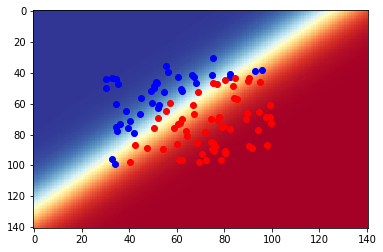

In [316]:
xs = np.arange(30, 100.5, 0.5)
ys = np.arange(30, 100.5, 0.5)
xx,yy = np.meshgrid(xs, ys)
Z = seta[0] + seta[1] * xx + seta[2] * yy
A = 1/(1+np.exp(-Z))
plt.imshow(A, aspect='auto', cmap=plt.get_cmap('RdYlBu_r'))

plt.scatter(x_label0, y_label0, alpha=1, c='b')
plt.scatter(x_label1, y_label1, alpha=1, c='r')
plt.show()